In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Ice Cream.csv")


print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000
Temperature    0
Revenue        0
dtype: int64


In [3]:
df = df.dropna()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

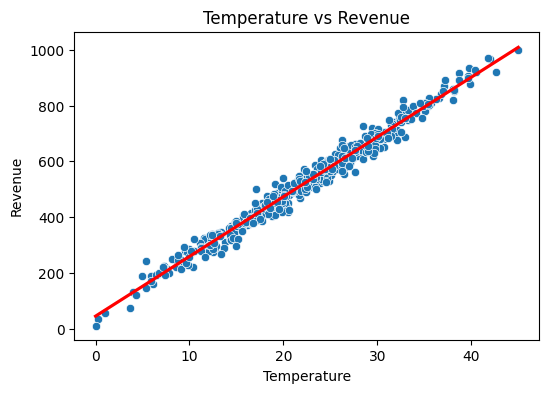

Correlation Matrix:
              Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title("Temperature vs Revenue")
sns.regplot(x='Temperature', y='Revenue', data=df, scatter=False, color='red')
plt.show()

corr = df.corr()
print("Correlation Matrix:\n", corr)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Temperature']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)


Linear Regression Performance:
R² Score: 0.9771509516333023
MAE: 19.195652579103704
RMSE: 25.543958747446354

Decision Tree Performance:
R² Score: 0.9610629297649239
MAE: 25.85583333333333
RMSE: 33.3453884451142
